In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from scipy.stats import zscore
from sklearn.preprocessing import LabelEncoder

import warnings 
warnings.filterwarnings('ignore')



In [2]:
#importing dataset
df=pd.read_csv("C:\\Users\\Umesh Gupta\\Downloads\\avocado.csv")
df

Unnamed: 0        Date  AveragePrice  Total Volume     4046       4225  \
0               0  2015-12-27          1.33      64236.62  1036.74   54454.85   
1               1  2015-12-20          1.35      54876.98   674.28   44638.81   
2               2  2015-12-13          0.93     118220.22   794.70  109149.67   
3               3  2015-12-06          1.08      78992.15  1132.00   71976.41   
4               4  2015-11-29          1.28      51039.60   941.48   43838.39   
...           ...         ...           ...           ...      ...        ...   
18244           7  2018-02-04          1.63      17074.83  2046.96    1529.20   
18245           8  2018-01-28          1.71      13888.04  1191.70    3431.50   
18246           9  2018-01-21          1.87      13766.76  1191.92    2452.79   
18247          10  2018-01-14          1.93      16205.22  1527.63    2981.04   
18248          11  2018-01-07          1.62      17489.58  2894.77    2356.13   

         4770  Total Bags  Small Bags  Large Bags  XLarge Bags          type  \
0       48.16     8696.87     8603.62       93.25          0.0  conventional   
1       58.33     9505.56     9408.07       97.49          0.0  conventional   
2      130.50     8145.35     8042.21      103.14          0.0  conventional   
3       72.58     5811.16     5677.40      133.76          0.0  conventional   
4       75.78     6183.95     5986.26      197.69          0.0  conventional   
...       ...         ...         ...         ...          ...           ...   
18244    0.00    13498.67    13066.82      431.85          0.0       organic   
18245    0.00     9264.84     8940.04      324.80          0.0       organic   
18246  727.94     9394.11     9351.80       42.31          0.0       organic   
18247  727.01    10969.54    10919.54       50.00          0.0       organic   
18248  224.53    12014.15    11988.14       26.01          0.0       organic   

       year            region  
0      2015            Albany  
1      2015            Albany  
2      2015            Albany  
3      2015            Albany  
4      2015            Albany  
...     ...               ...  
18244  2018  WestTexNewMexico  
18245  2018  WestTexNewMexico  
18246  2018  WestTexNewMexico  
18247  2018  WestTexNewMexico  
18248  2018  WestTexNewMexico  

[18249 rows x 14 columns]

In [3]:
#checking info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


<AxesSubplot:>

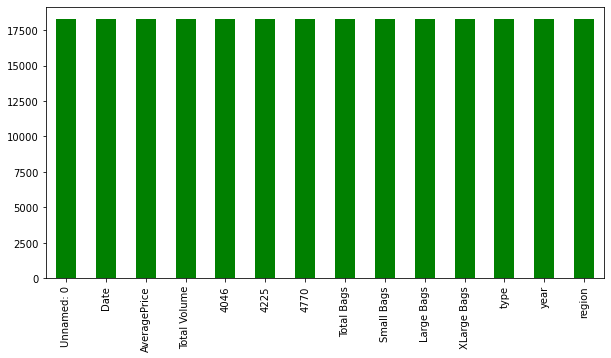

In [4]:
#count plot for features
df.count().plot.bar(figsize=(10,5),color="g")

<AxesSubplot:>

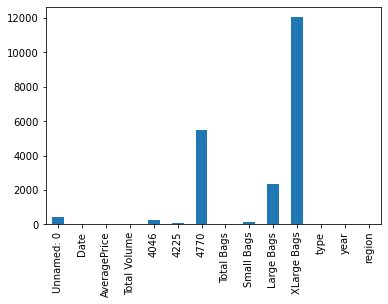

In [5]:
#checking 0 in dataset
df.isin([0]).sum().plot.bar()

In [6]:
# checking nan values
df.isna().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [7]:
#checking basic info about dataset
df.describe()

Unnamed: 0  AveragePrice  Total Volume          4046          4225  \
count  18249.000000  18249.000000  1.824900e+04  1.824900e+04  1.824900e+04   
mean      24.232232      1.405978  8.506440e+05  2.930084e+05  2.951546e+05   
std       15.481045      0.402677  3.453545e+06  1.264989e+06  1.204120e+06   
min        0.000000      0.440000  8.456000e+01  0.000000e+00  0.000000e+00   
25%       10.000000      1.100000  1.083858e+04  8.540700e+02  3.008780e+03   
50%       24.000000      1.370000  1.073768e+05  8.645300e+03  2.906102e+04   
75%       38.000000      1.660000  4.329623e+05  1.110202e+05  1.502069e+05   
max       52.000000      3.250000  6.250565e+07  2.274362e+07  2.047057e+07   

               4770    Total Bags    Small Bags    Large Bags    XLarge Bags  \
count  1.824900e+04  1.824900e+04  1.824900e+04  1.824900e+04   18249.000000   
mean   2.283974e+04  2.396392e+05  1.821947e+05  5.433809e+04    3106.426507   
std    1.074641e+05  9.862424e+05  7.461785e+05  2.439660e+05   17692.894652   
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00       0.000000   
25%    0.000000e+00  5.088640e+03  2.849420e+03  1.274700e+02       0.000000   
50%    1.849900e+02  3.974383e+04  2.636282e+04  2.647710e+03       0.000000   
75%    6.243420e+03  1.107834e+05  8.333767e+04  2.202925e+04     132.500000   
max    2.546439e+06  1.937313e+07  1.338459e+07  5.719097e+06  551693.650000   

               year  
count  18249.000000  
mean    2016.147899  
std        0.939938  
min     2015.000000  
25%     2015.000000  
50%     2016.000000  
75%     2017.000000  
max     2018.000000

# graphical analysis

<AxesSubplot:xlabel='AveragePrice', ylabel='Density'>

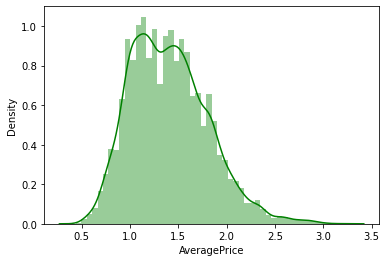

In [8]:
#univariate analysis
sns.distplot(df["AveragePrice"],color="green")

# bivariate analysis

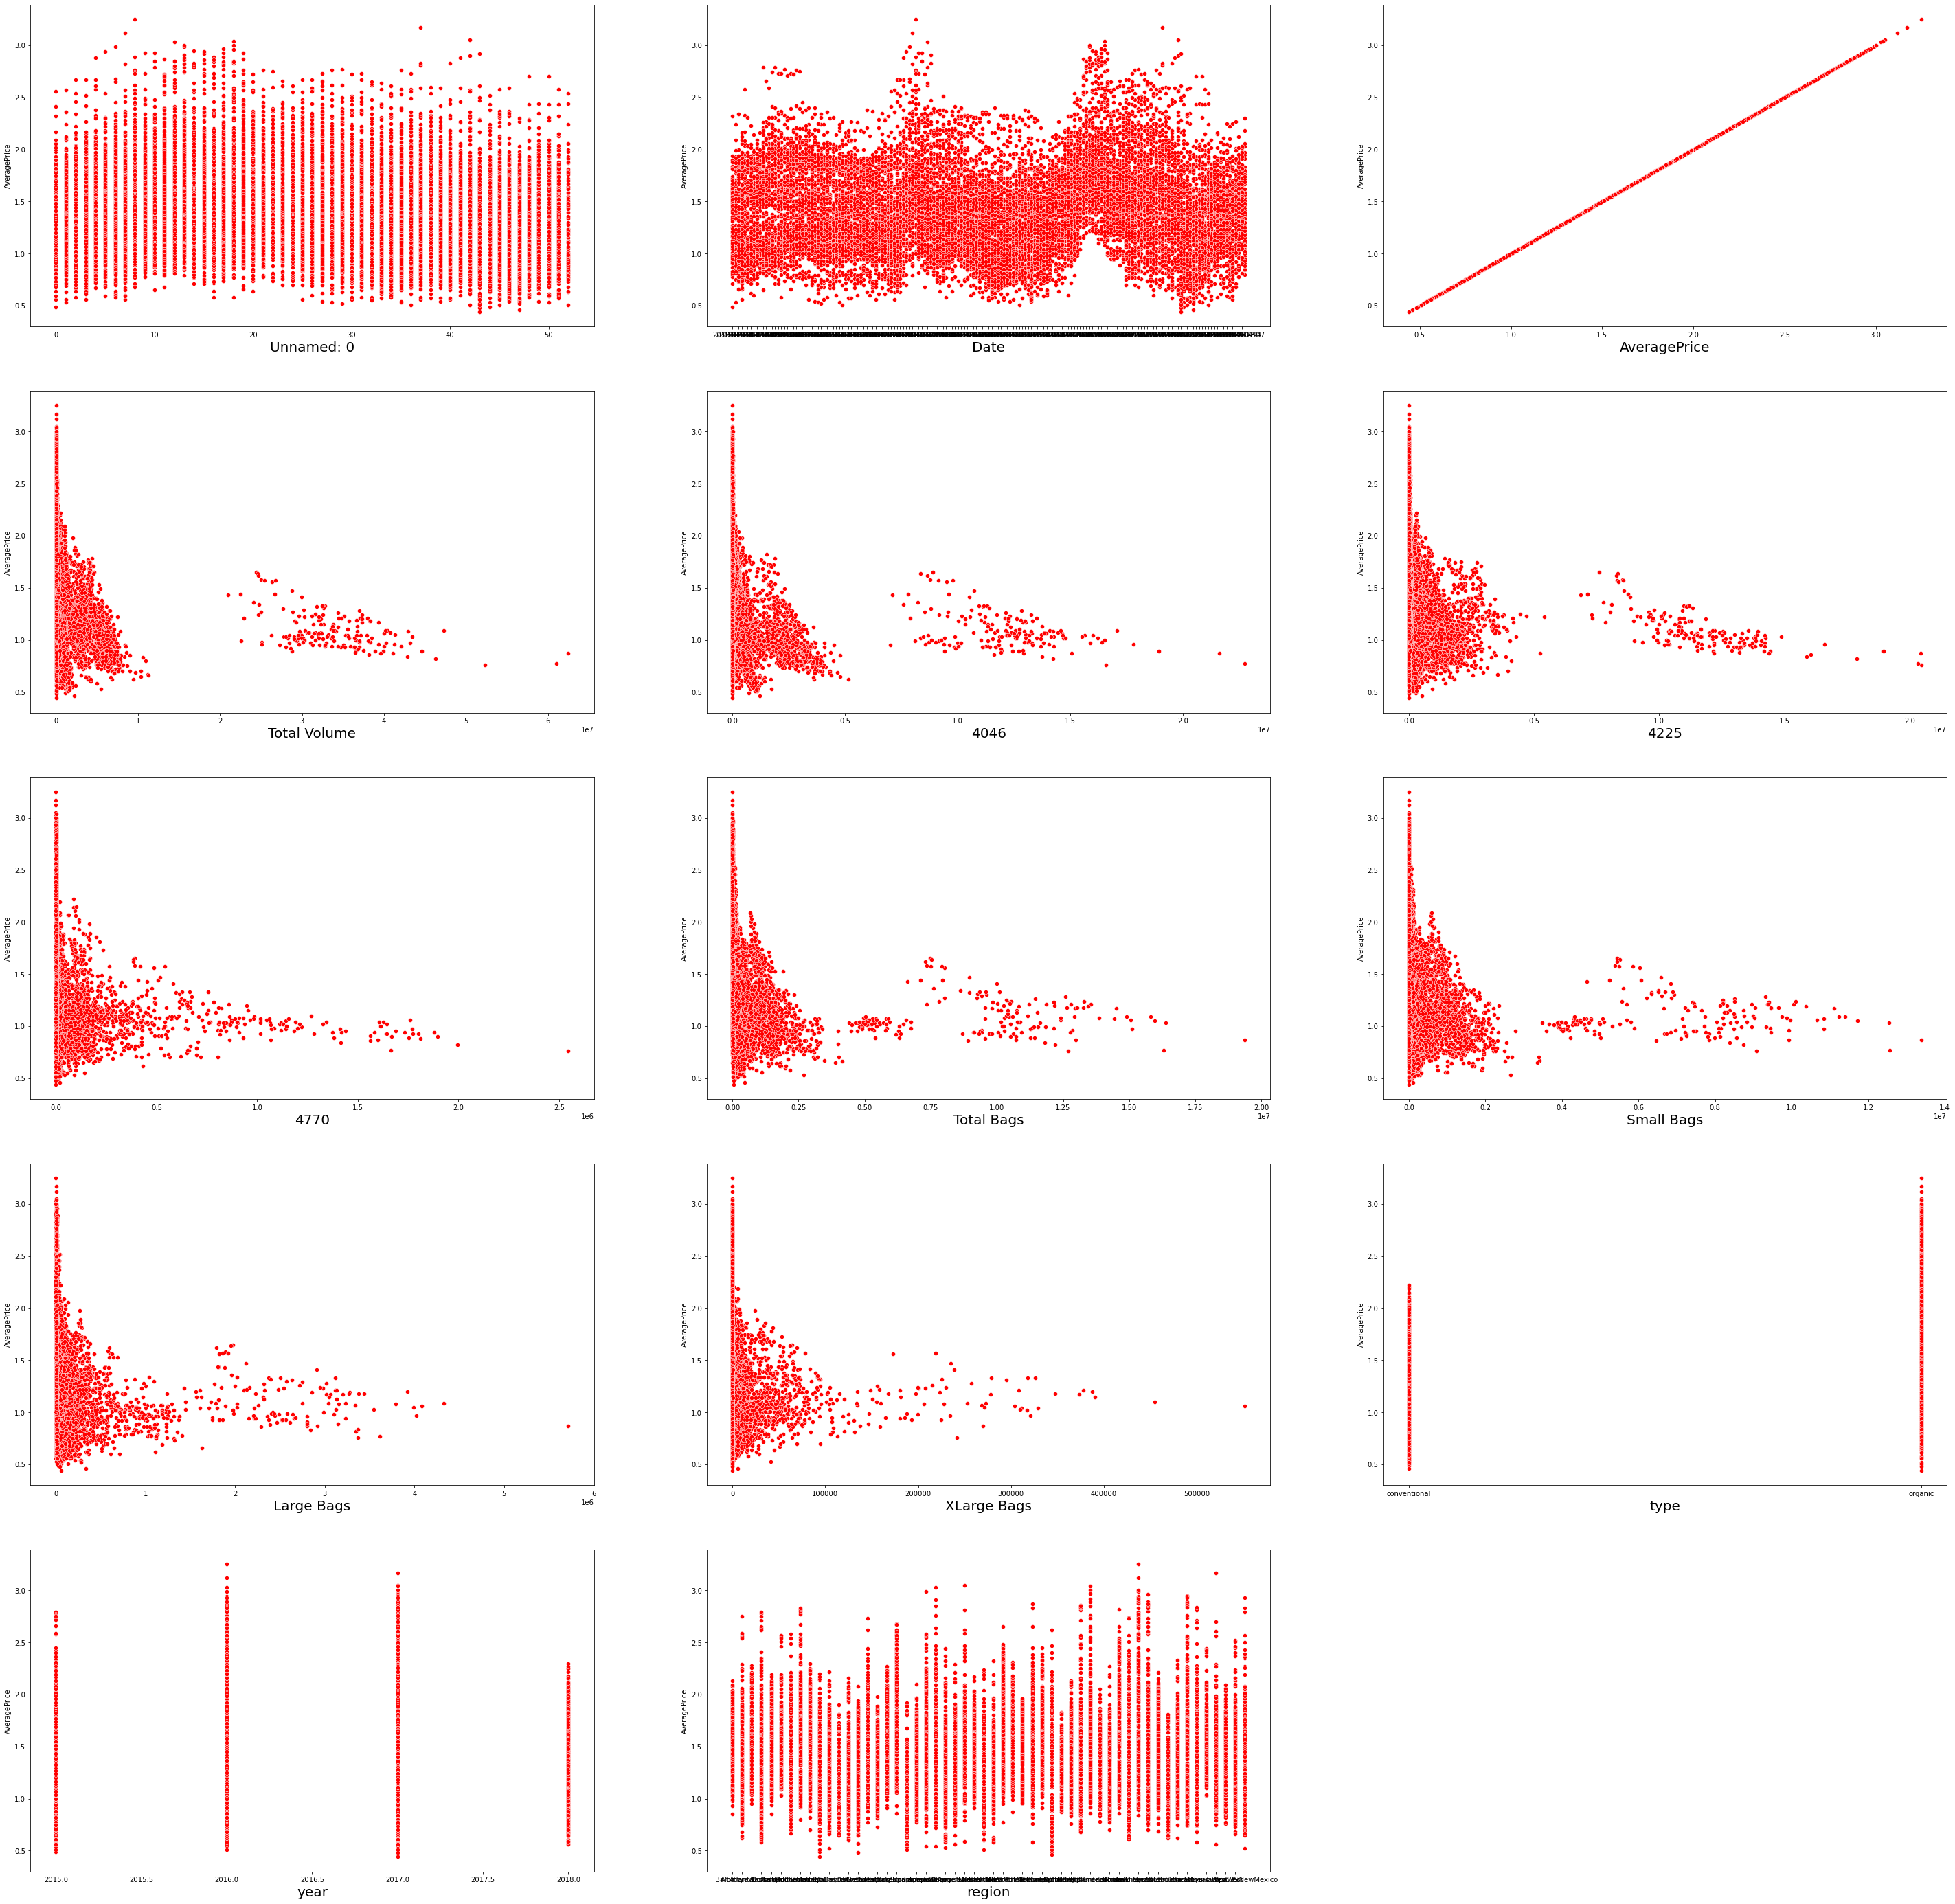

In [9]:
plt.figure(figsize=(50,50))
plotnumber = 1
for column in df:
    if plotnumber<=15:
        ax=plt.subplot(5,3,plotnumber)
        sns.scatterplot(y=df["AveragePrice"],x=df[column],color="red")
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

<AxesSubplot:xlabel='type', ylabel='AveragePrice'>

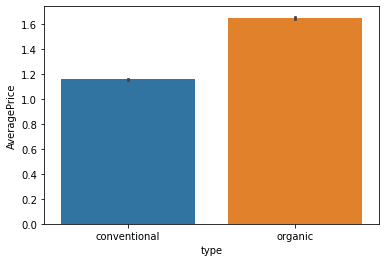

In [10]:
sns.barplot(df["type"],df["AveragePrice"])

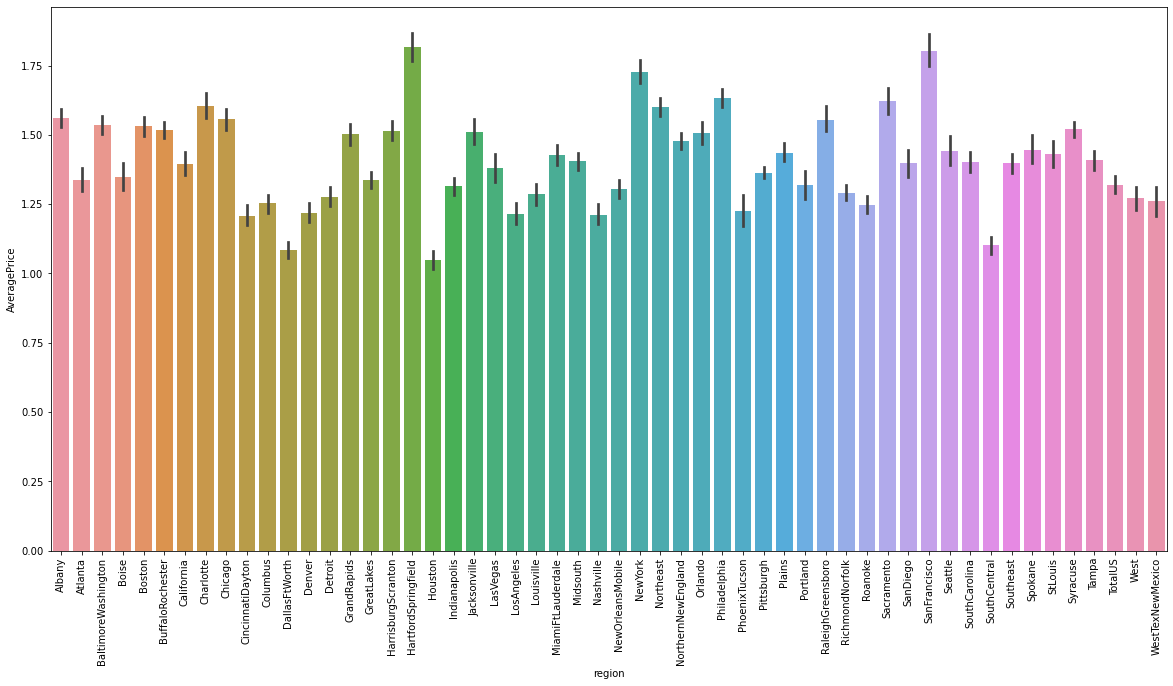

In [11]:
#showing average price rate with respect to region
plt.figure(figsize=(20,10))
sns.barplot(df["region"],df["AveragePrice"])
plt.xticks(rotation=90)
plt.show()

In [12]:
#splitting date into date month as year is already present 
df["Date"] = pd.to_datetime(df["Date"])
df["Month"]= df["Date"].dt.month
df["day"]= df["Date"].dt.day

Text(0.5, 1.0, 'Average Price')

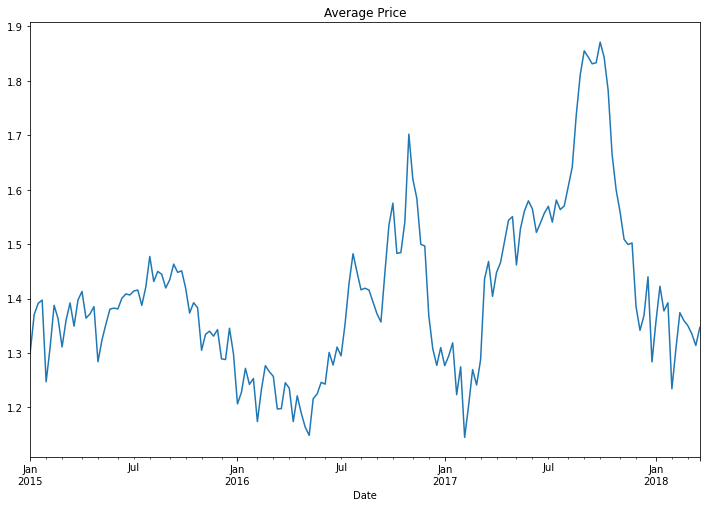

In [13]:
#bivariate analysis
byDate=df.groupby('Date').mean()
plt.figure(figsize=(12,8))
byDate['AveragePrice'].plot()

plt.title('Average Price')

In [14]:
#using label encoder for categorical features
la=LabelEncoder()
df["type"]=la.fit_transform(df.type)
df["region"]=la.fit_transform(df.region)

<function matplotlib.pyplot.show(close=None, block=None)>

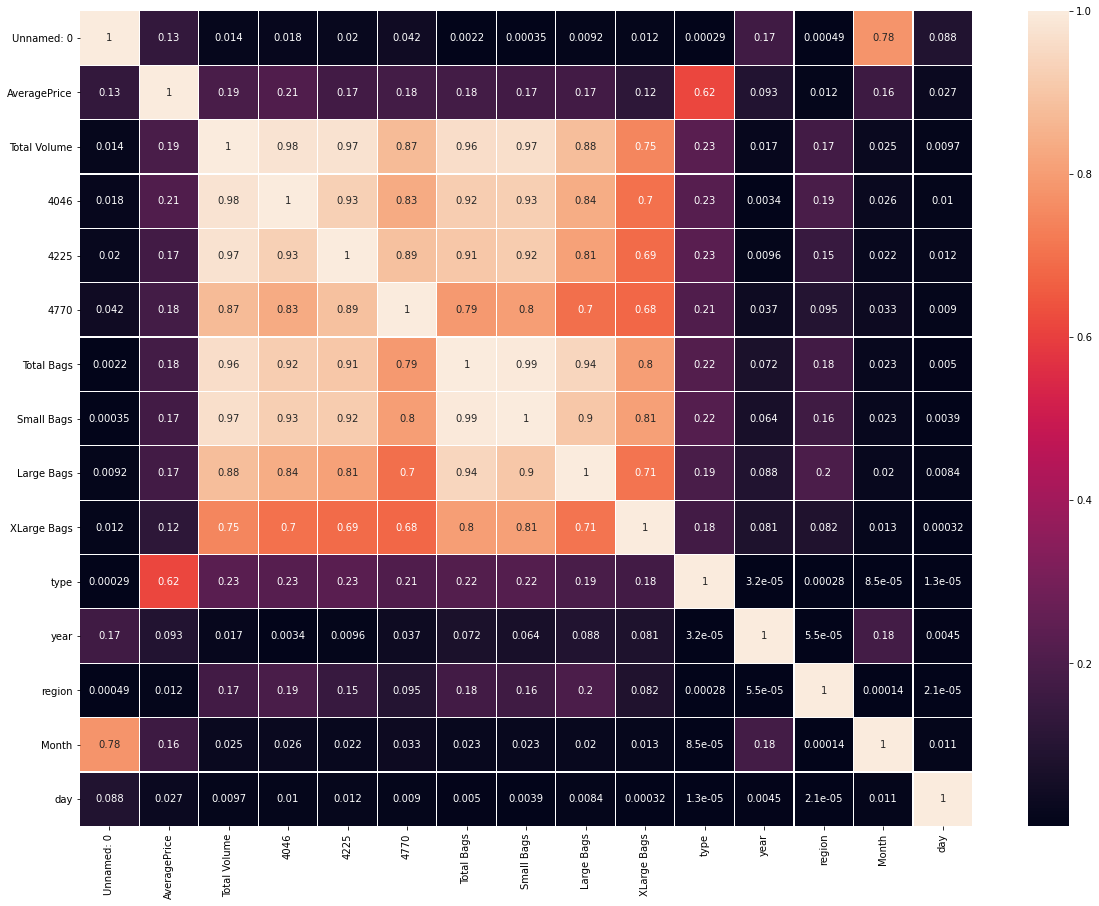

In [15]:
#multivariate anlysis
df_corr=df.corr().abs()
plt.figure(figsize=(20,15))
sns.heatmap(df_corr,annot=True,fmt=".2g",linewidths=.2,cbar=True)
plt.show

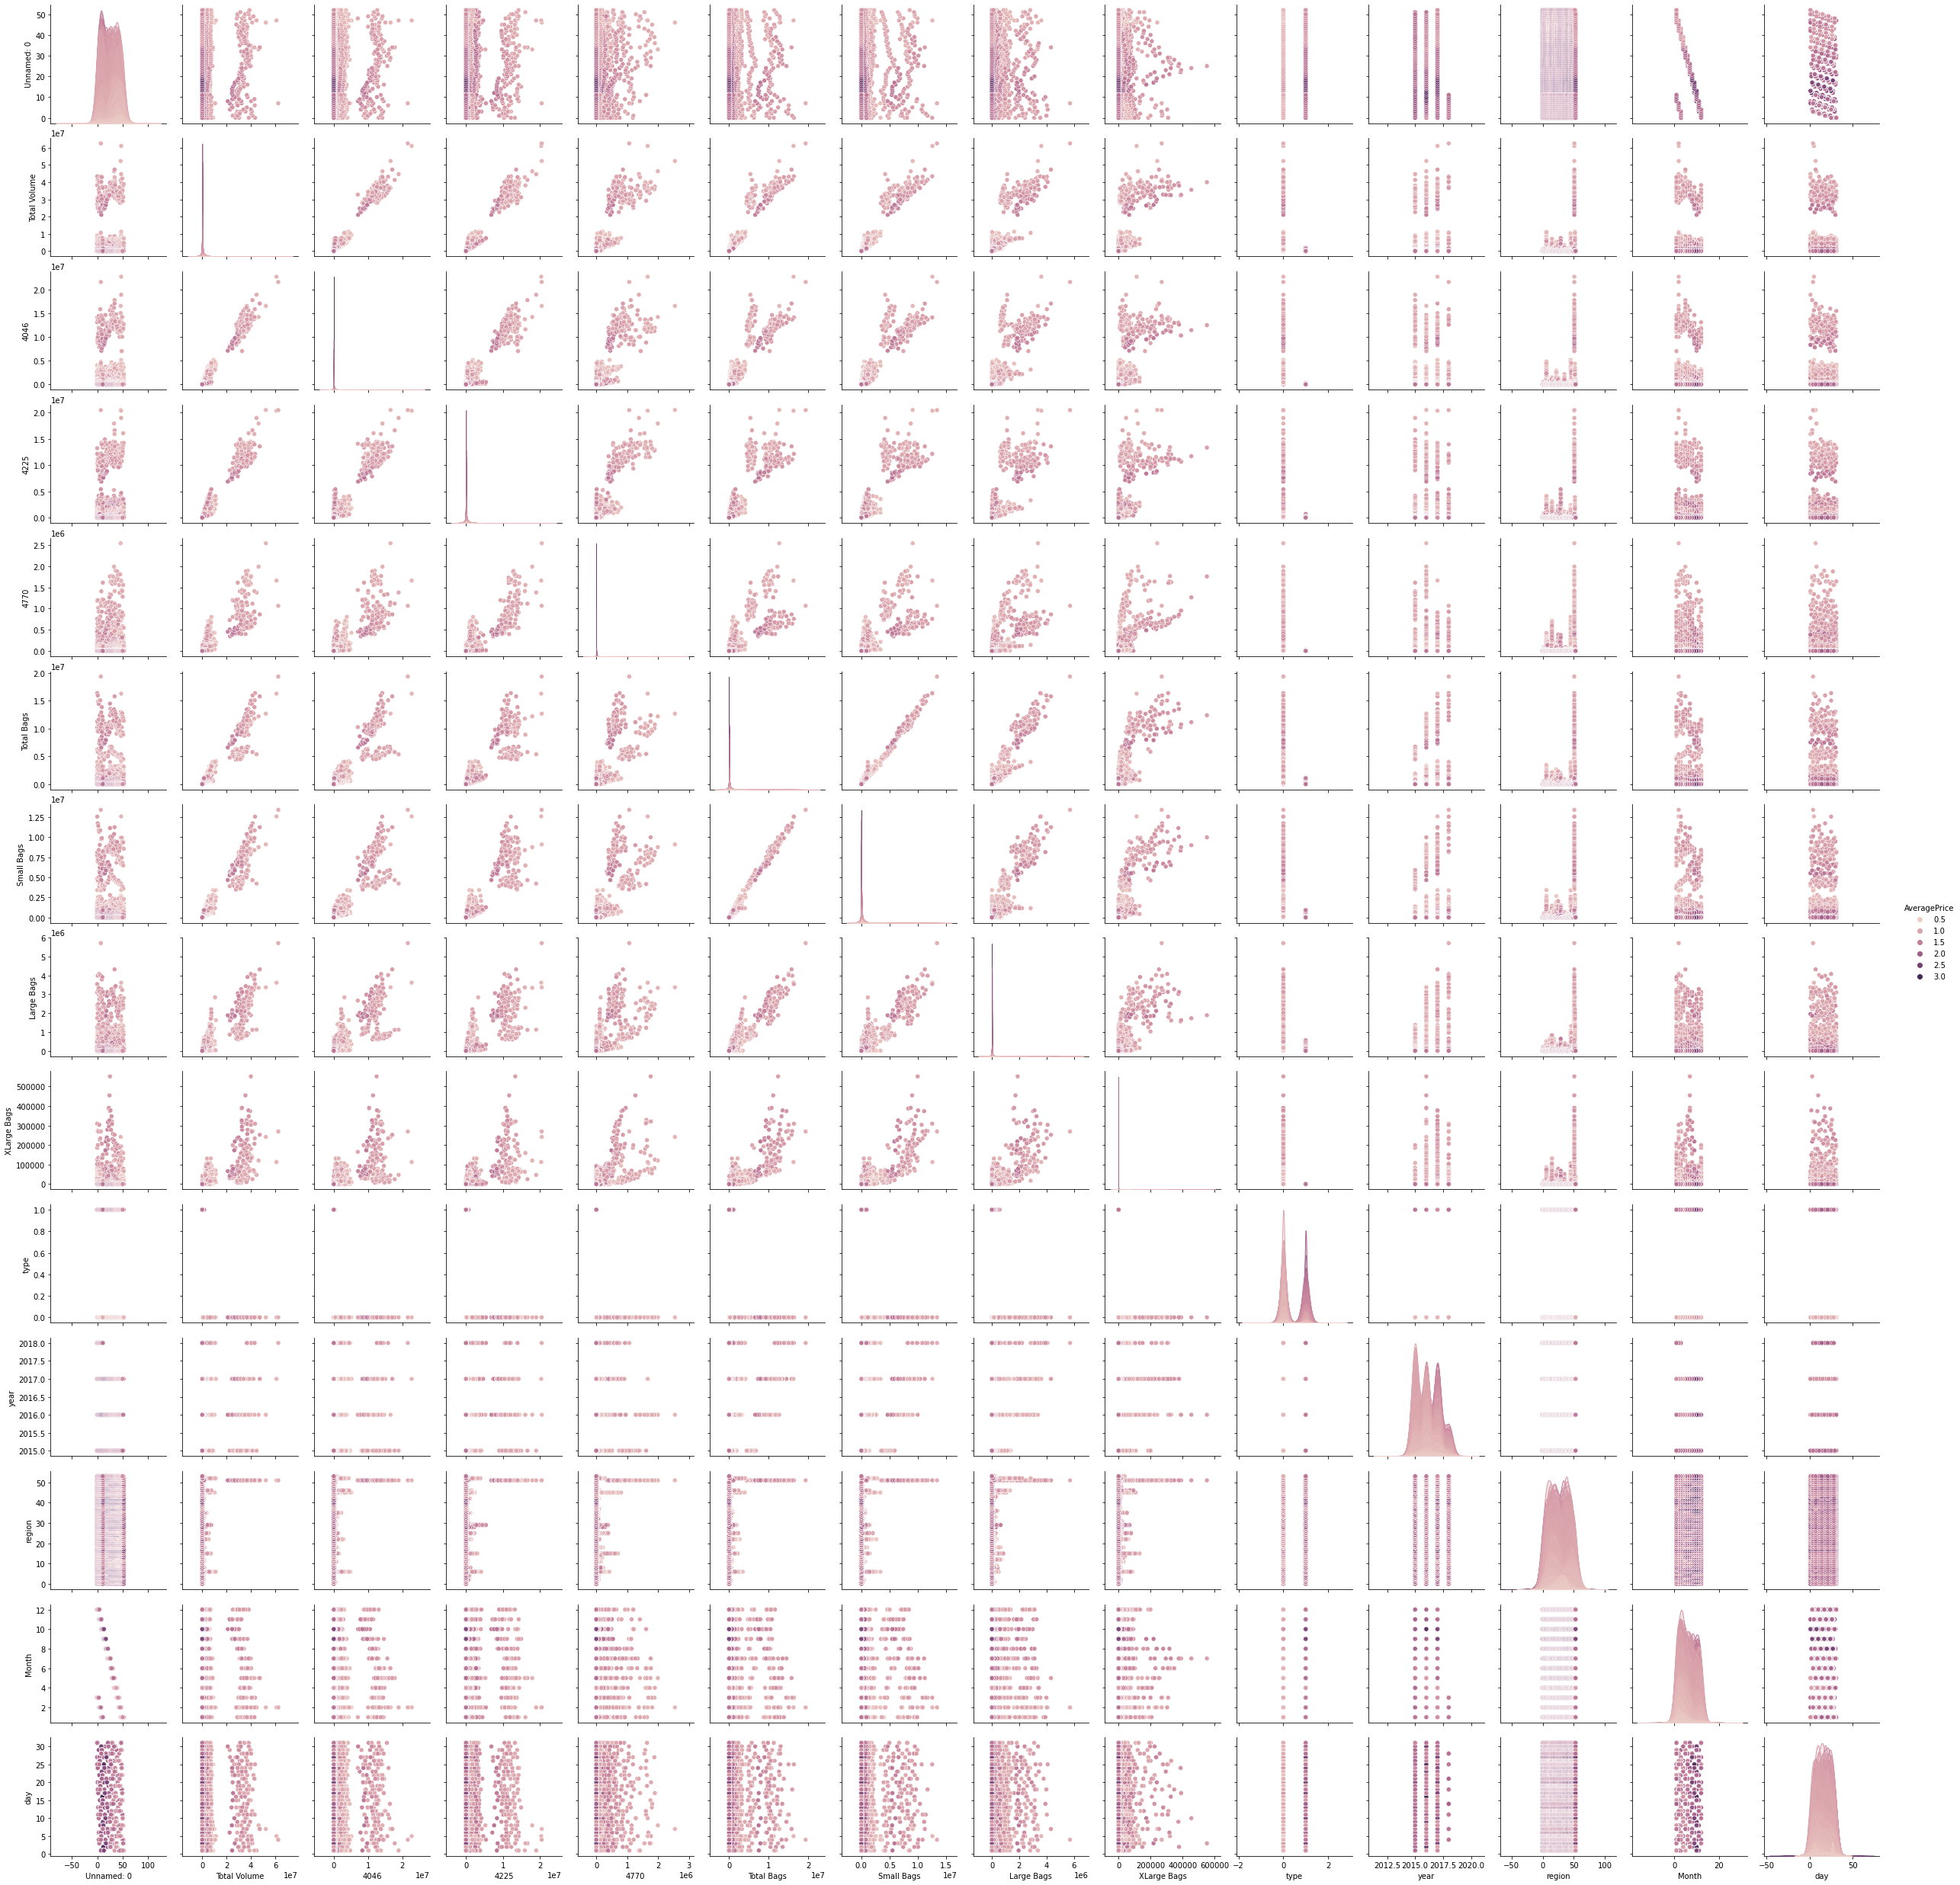

In [16]:
#pair plot
sns.pairplot(df,hue="AveragePrice")

# data cleaning

In [17]:
# droping zeros 
df[df["Total Bags"]==0]

Unnamed: 0       Date  AveragePrice  Total Volume      4046      4225  \
9212           34 2015-05-03          2.03       3976.19   1325.62   2650.57   
11024          26 2015-06-28          1.53      41116.32   7314.21  33780.38   
11320          10 2015-10-18          2.79      12642.11    961.55  11680.56   
11321          11 2015-10-11          2.66      14031.73   1046.84  12984.89   
11333          23 2015-07-19          2.36      19558.81   3893.65  15665.16   
11347          37 2015-04-12          1.54      28220.45  18887.66   9332.79   
11348          38 2015-04-05          1.55      26530.70  17104.69   9426.01   
11387          25 2015-07-05          1.98      29929.57   8841.34  20807.76   
11388          26 2015-06-28          1.71      46229.47   8112.46  37972.31   
11594          24 2015-07-12          2.07       2786.45    680.60   2105.85   
11595          25 2015-07-05          1.85       3162.45    799.67   2362.78   
11596          26 2015-06-28          1.61       4088.37    537.84   3550.53   
11597          27 2015-06-21          1.59       4436.79    872.72   3564.07   
11614          44 2015-02-22          1.41       4655.86   2067.41   2588.45   
11662          40 2015-03-22          1.83       3795.21   1305.95   2489.26   

         4770  Total Bags  Small Bags  Large Bags  XLarge Bags  type  year  \
9212     0.00         0.0         0.0         0.0          0.0     1  2015   
11024   21.73         0.0         0.0         0.0          0.0     1  2015   
11320    0.00         0.0         0.0         0.0          0.0     1  2015   
11321    0.00         0.0         0.0         0.0          0.0     1  2015   
11333    0.00         0.0         0.0         0.0          0.0     1  2015   
11347    0.00         0.0         0.0         0.0          0.0     1  2015   
11348    0.00         0.0         0.0         0.0          0.0     1  2015   
11387  280.47         0.0         0.0         0.0          0.0     1  2015   
11388  144.70         0.0         0.0         0.0          0.0     1  2015   
11594    0.00         0.0         0.0         0.0          0.0     1  2015   
11595    0.00         0.0         0.0         0.0          0.0     1  2015   
11596    0.00         0.0         0.0         0.0          0.0     1  2015   
11597    0.00         0.0         0.0         0.0          0.0     1  2015   
11614    0.00         0.0         0.0         0.0          0.0     1  2015   
11662    0.00         0.0         0.0         0.0          0.0     1  2015   

       region  Month  day  
9212        1      5    3  
11024      36      6   28  
11320      42     10   18  
11321      42     10   11  
11333      42      7   19  
11347      42      4   12  
11348      42      4    5  
11387      43      7    5  
11388      43      6   28  
11594      47      7   12  
11595      47      7    5  
11596      47      6   28  
11597      47      6   21  
11614      47      2   22  
11662      48      3   22

In [18]:
df.drop("Date",axis=1,inplace=True)

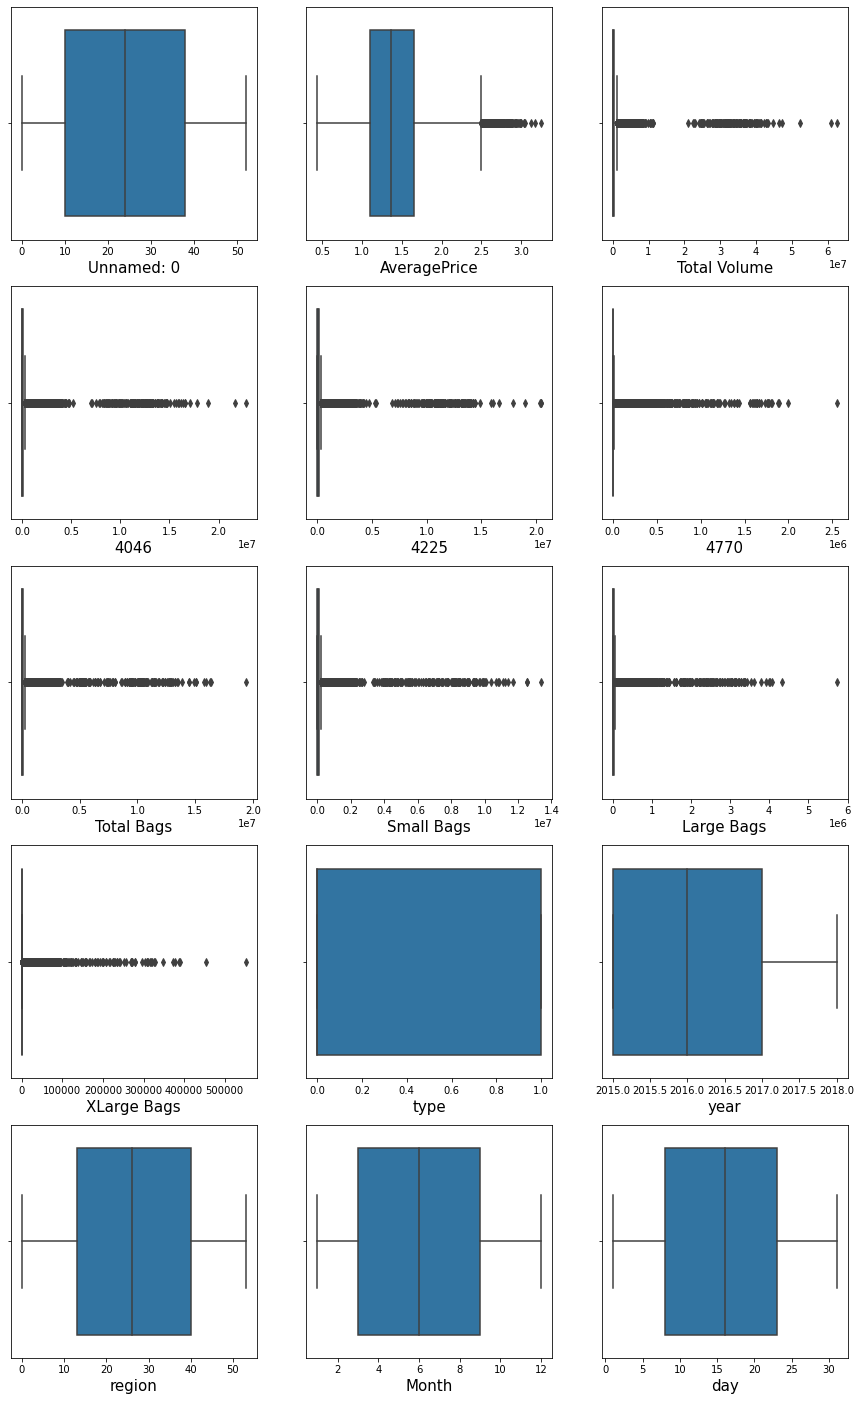

In [19]:
#using box plot for outliers
plt.figure(figsize=(15,30))
plotnumber=1
for i in df:
    if plotnumber<=18:
        ax=plt.subplot(6,3,plotnumber)
        sns.boxplot(df[i])
        plt.xlabel(i,fontsize=15)
        plotnumber+=1
plt.show()

In [20]:
# using z score for outliers removal
zscr=zscore(df[['Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags']])
abs_score=np.abs(zscr)

In [21]:
filter=(abs_score<3).all (axis=1)

In [22]:
new_df=df[filter]

In [23]:
#dataloss
print("the data loss is : ",((df.shape[0]-new_df.shape[0])/df.shape[0])*100)

the data loss is :  2.55904433119623


In [24]:
#skewness check
new_df.skew()

Unnamed: 0      0.112971
AveragePrice    0.560969
Total Volume    3.782060
4046            4.928850
4225            4.472729
4770            5.137120
Total Bags      4.082103
Small Bags      4.238647
Large Bags      5.072468
XLarge Bags     6.159391
type           -0.052210
year            0.220792
region          0.005773
Month           0.098217
day             0.011251
dtype: float64

In [25]:
#for skewness removal
for i in new_df[['Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags']]:
    new_df[i]=np.sqrt(new_df[i])

In [26]:
#for skewness removal
from sklearn.preprocessing import PowerTransformer
scale=PowerTransformer(method='yeo-johnson')

In [27]:
b=['Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags']

In [28]:
new_df[b]=scale.fit_transform(new_df[b].values)
new_df[b]

Total Volume      4046      4225      4770  Total Bags  Small Bags  \
0         -0.065536 -0.655993  0.359723 -0.187268   -0.528975   -0.339648   
1         -0.137827 -0.775789  0.277522 -0.144958   -0.489617   -0.303566   
2          0.215503 -0.730424  0.658098  0.037105   -0.557819   -0.366664   
3          0.029552 -0.631107  0.477384 -0.096173   -0.704376   -0.503074   
4         -0.171067 -0.683122  0.270106 -0.086483   -0.677652   -0.482643   
...             ...       ...       ...       ...         ...         ...   
18244     -0.670138 -0.459855 -0.926876 -1.243247   -0.331962   -0.168032   
18245     -0.763618 -0.616494 -0.669398 -1.243247   -0.500997   -0.324206   
18246     -0.767582 -0.616441 -0.778619  0.440572   -0.494852   -0.305998   
18247     -0.693814 -0.545225 -0.715568  0.440268   -0.425691   -0.242673   
18248     -0.659264 -0.356827 -0.791481  0.162807   -0.384763   -0.204028   

       Large Bags  XLarge Bags  
0       -0.760042    -0.680434  
1       -0.750708    -0.680434  
2       -0.738804    -0.680434  
3       -0.682762    -0.680434  
4       -0.595101    -0.680434  
...           ...          ...  
18244   -0.407295    -0.680434  
18245   -0.477699    -0.680434  
18246   -0.916982    -0.680434  
18247   -0.885234    -0.680434  
18248   -1.005121    -0.680434  

[17782 rows x 8 columns]

In [29]:
new_df.skew()

Unnamed: 0      0.112971
AveragePrice    0.560969
Total Volume   -0.005471
4046           -0.033554
4225           -0.040618
4770            0.012431
Total Bags     -0.020538
Small Bags     -0.021853
Large Bags     -0.106871
XLarge Bags     0.833845
type           -0.052210
year            0.220792
region          0.005773
Month           0.098217
day             0.011251
dtype: float64

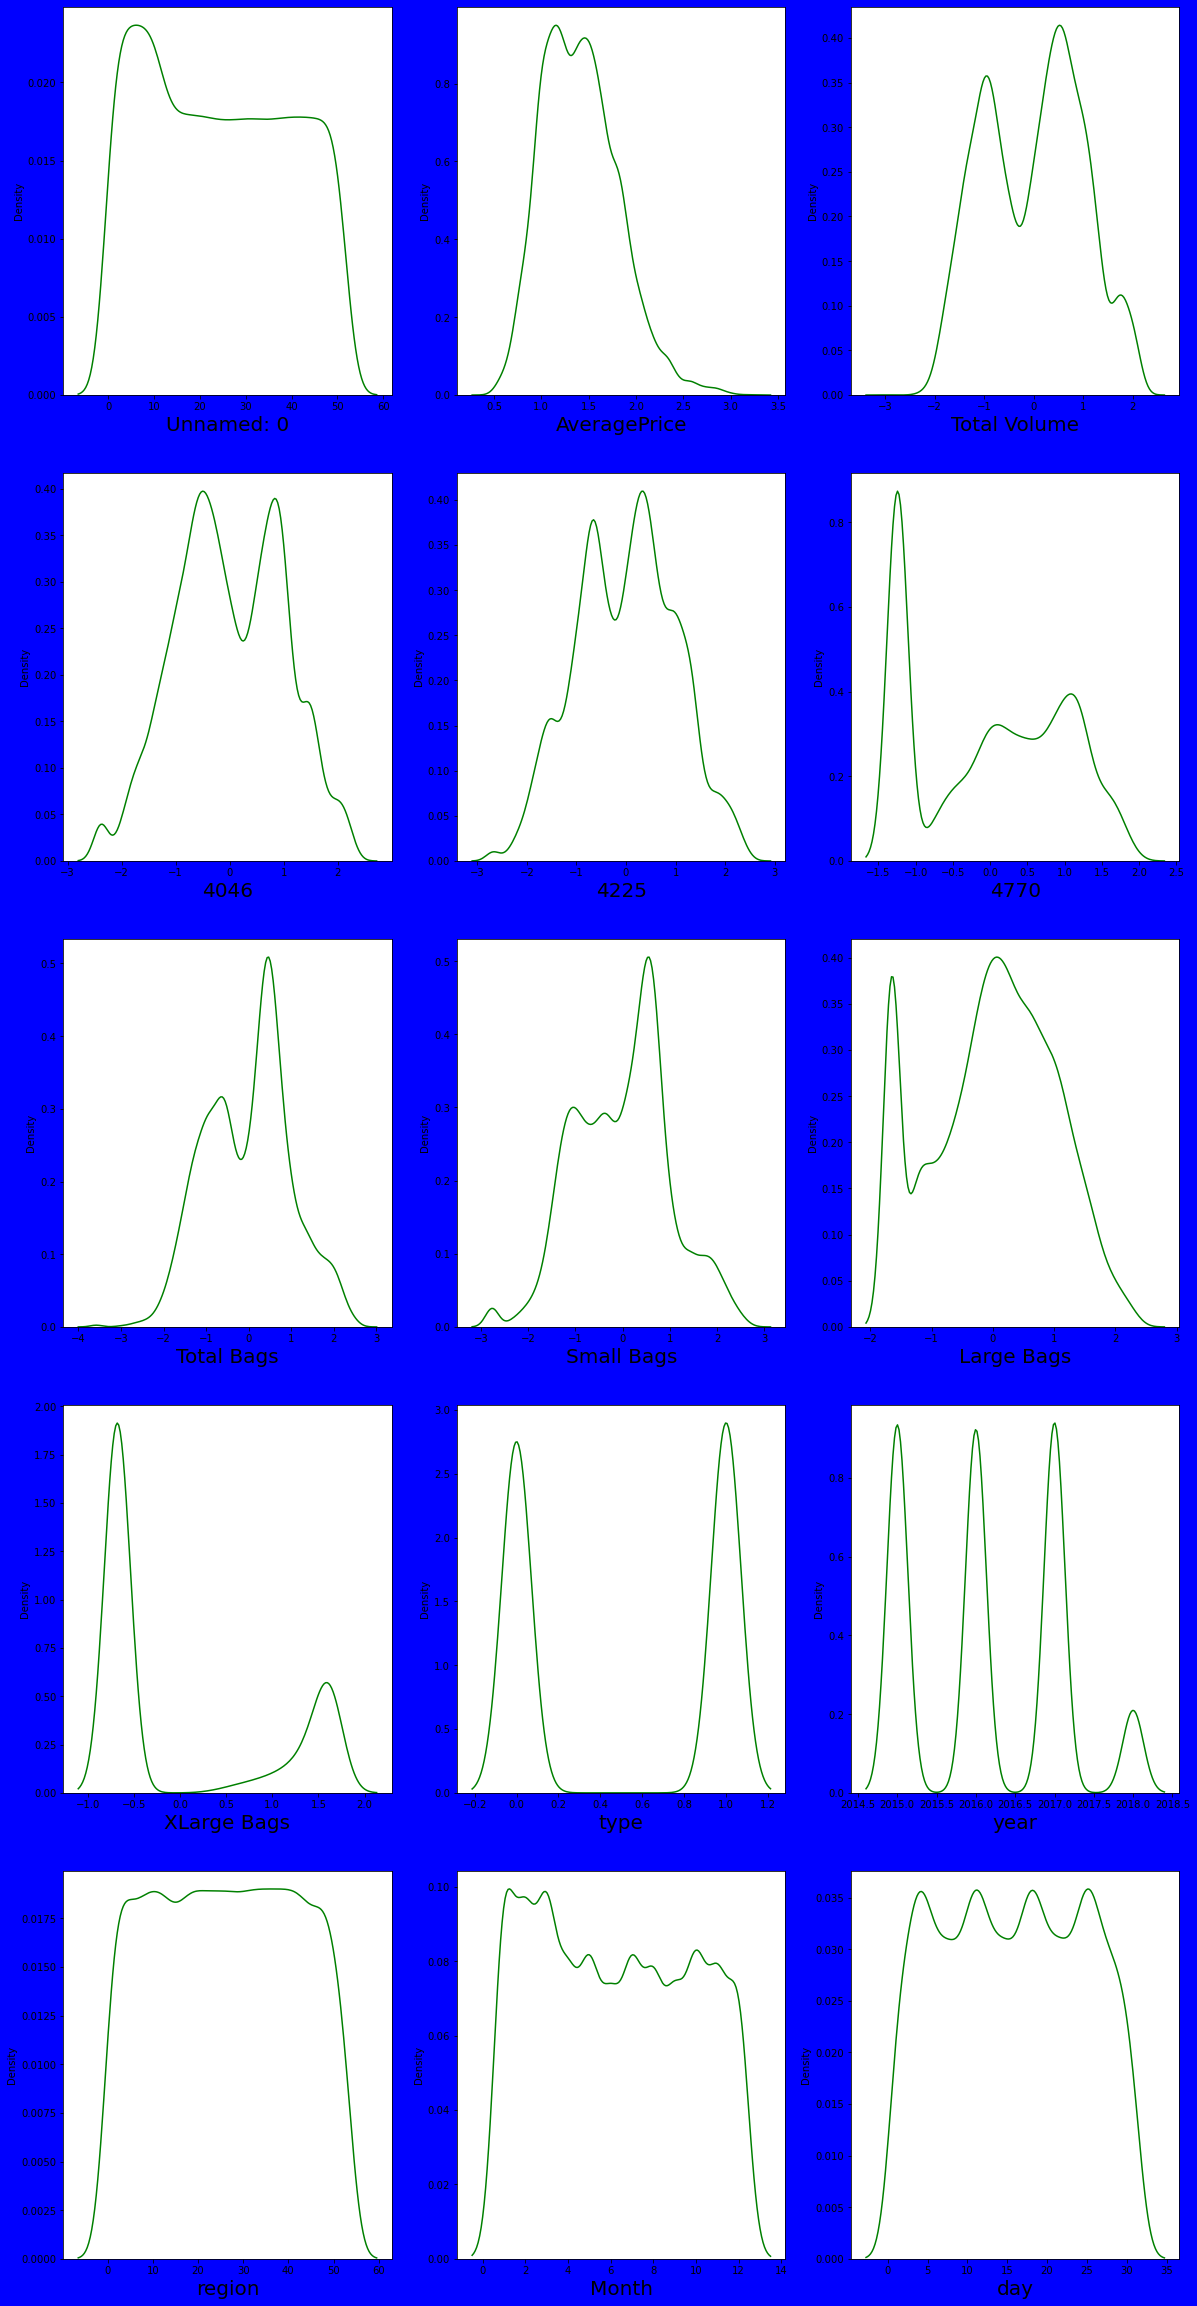

In [153]:
plt.figure(figsize=(20,50),facecolor='blue')
plotnumber = 1
for column in new_df:
    if plotnumber<=18:
        ax=plt.subplot(6,3,plotnumber)
        sns.distplot(new_df[column],kde=True,color="green",hist=False)
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

In [53]:
#spliting of dataset for model building
x=new_df.drop(columns=["AveragePrice","Unnamed: 0"],axis=1)
y=new_df['AveragePrice']

In [90]:
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.linear_model import LinearRegression,Ridge
from sklearn.ensemble import GradientBoostingRegressor, BaggingRegressor
from xgboost import XGBRegressor

In [91]:
#scaling datset
scale=StandardScaler()
x_scaled=scale.fit_transform(x)


In [95]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.30,random_state=50)

# linear regression

In [96]:
linear =LinearRegression ()
linear.fit(x_train,y_train)

LinearRegression()

In [97]:
y_pred=linear.predict(x_test)

In [98]:
r2_score(y_test,y_pred)

r2_score: 0.5473778567241487


In [127]:
cross_val_score(linear,x_scaled,y,cv=15).mean()

0.1628146008035477

In [100]:
mean_squared_error(y_test,y_pred)

0.0732324816416278

# xgb regressor

In [142]:
xg =XGBRegressor (verbosity=0)
xg.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=0)

In [119]:
y_pred=xg.predict(x_test)

In [120]:
r2_score(y_test,y_pred)

0.8964117757301394

In [124]:
cross_val_score(xg,x_scaled,y,cv=15).mean()

0.6033839620459209

In [105]:
mean_squared_error(y_test,y_pred)

0.016760167050660784

# GradientBoostingRegressor

In [154]:
gb =GradientBoostingRegressor (max_depth=8)
gb.fit(x_train,y_train)

GradientBoostingRegressor(max_depth=8)

In [155]:
y_pred=gb.predict(x_test)

In [156]:
r2_score(y_test,y_pred)

0.9005004044481156

In [157]:
cross_val_score(gb,x_scaled,y,cv=15).mean()

0.5677968515667866

In [158]:
mean_squared_error(y_test,y_pred)

0.016098643013499087

# BaggingRegressor

In [111]:
r= BaggingRegressor()
r.fit(x_train,y_train)

BaggingRegressor()

In [112]:
y_pred=r.predict(x_test)

In [113]:
r2_score(y_test,y_pred)

0.8576560028396384

In [126]:
cross_val_score(r,x_scaled,y,cv=15).mean()

0.40175264896124724

In [115]:
mean_squared_error(y_test,y_pred)

0.023030698594189315

# xgb regressor is my best model

In [ ]:
i am selecteing my best model on the basis of cv ,r2score and mean_squared_error

In [197]:
grid_params= {"n_estimators":[100,300],
              "max_depth":[8,9,11],
              "base_score":[0.5,0.6,0.8],
              "random_state":[0,50,100]
              
}

In [198]:
grid_search = GridSearchCV(estimator = xg,
                          param_grid = grid_params,
                          cv=3,n_jobs=-1)

In [199]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=0.8, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=1, gamma=0, gpu_id=-1,
                                    importance_type='gain',
                                    interaction_constraints='',
                                    learning_rate=0.300000012, max_delta_step=0,
                                    max_depth=11, min_child_weight=1,
                                    min_samples_split=3, missing=nan,
                                    monotone_constraints='()', n_estimator=300,
                                    n_estimators=100, n_jobs=8,
                                    num_parallel_tree=1, random_state=0,
                                    reg_alpha=0, reg_lambda=1,
                                    scale_pos_weight=1, subsample=1,
                                    tree_method='exact', validat

In [200]:
grid_search.best_params_

{'base_score': 0.5, 'max_depth': 8, 'n_estimators': 300, 'random_state': 0}

In [204]:
xg = XGBRegressor (base_score=0.5,max_depth=8,n_estimator=300,random_state=3)
xg.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=8,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimator=300, n_estimators=100, n_jobs=8, num_parallel_tree=1,
             random_state=3, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             subsample=1, tree_method='exact', validate_parameters=1,
             verbosity=None)

In [205]:
r2_score(y_test,y_pred)

0.9005004044481156

In [211]:
cross_val_score(xg,x_scaled,y,cv=18).mean()

0.5583534519290657

In [212]:
mean_squared_error(y_test,y_pred)

0.016098643013499087

In [213]:
import pickle
filename='avacado.pk1'
pickle.dump(xg,open(filename,'wb'))